In [1]:
#!/usr/bin/python3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from pathlib import Path
from matplotlib.pyplot import figure, draw



#########################################################################
#   Configurações globais do grafico
plt.rcParams['axes.linewidth']=2
plt.rc('font', size=18)         # controls default text sizes
#########################################################################

#########################################################################
#   Configurações para salvar e plotar o grafico 
BASE_PATH = os.getcwd() 
PATH_SVG=BASE_PATH+"/../../../../inkscape/cap6/beam/"
PATH_EPS=BASE_PATH+"/../../../../eps/cap6/beam/"
PATH_PNG=BASE_PATH+"/../../../../figs/cap6/beam/"
fname = "cdl_non-linear_mpi-openmp_speedup"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
fname_png = PATH_PNG+fname+".png"
PLOT_FIG = True
SAVE_FIG = True 
#########################################################################


#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method
df = pd.read_csv('./data/cdl_non-linear_mpi-openmp.csv')
pd.set_option('expand_frame_repr', False)
df

Num. Nodes  Num. Threads MPI x OpenMP  Num. Procs. MPI x OpenMP  Runtime (s) - P1  Runtime (s) - P2  Runtime (s) - P4  SpeedUp - Pure MPI (P1)  SpeedUp - MPI + OpenMP (P1)  SpeedUp - Pure MPI (P2)  SpeedUp - MPI + OpenMP (P2)  SpeedUp - Pure MPI (P4)  SpeedUp - MPI + OpenMP (P4)  Efficiency - Pure MPI (P1)  Efficiency - MPI + OpenMP (P1)  Efficiency - Pure MPI (P2)  Efficiency - MPI + OpenMP (P2)  Efficiency - Pure MPI (P4)  Efficiency - MPI + OpenMP (P4)
0            1             1          1+1                         1            4.0013           23.2084          420.4012                   1.0000                       1.0000                   1.0000                       1.0000                   1.0000                       1.0000                      1.0000                          1.0000                      1.0000                          1.0000                      1.0000                          1.0000
1            1             2          1+2                         2            3.1051           14.5474          288.4403                      NaN                       1.2886                      NaN                       1.5954                      NaN                       1.4575                         NaN                          0.6443                         NaN                          0.7977                         NaN                          0.7287
2            1             4          1+4                         4            2.1013            9.4906          213.6806                      NaN                       1.9042                      NaN                       2.4454                      NaN                       1.9674                         NaN                          0.4761                         NaN                          0.6114                         NaN                          0.4919
3            1             8          1+8                         8            1.7808            7.3610          166.6710                      NaN                       2.2469                      NaN                       3.1529                      NaN                       2.5223                         NaN                          0.2809                         NaN                          0.3941                         NaN                          0.3153
4            1            16         1+16                        16            1.7343            6.2384          143.4340                      NaN                       2.3072                      NaN                       3.7202                      NaN                       2.9310                         NaN                          0.1442                         NaN                          0.2325                         NaN                          0.1832
5            1            32         1+32                        32            1.6880            6.9618          167.3314                      NaN                       2.3704                      NaN                       3.3337                      NaN                       2.5124                         NaN                          0.0741                         NaN                          0.1042                         NaN                          0.0785
6            2             1          2+1                         2            2.1445           12.7884          230.4539                   1.8658                       1.8658                   1.8148                       1.8148                   1.8242                       1.8242                      0.9329                          0.9329                      0.9074                          0.9074                      0.9121                          0.9121
7            2             2          2+2                         4            1.6279            8.0999          156.7177                      NaN                       2.4580                      NaN                       2.8653                      NaN                       2.6825         

In [2]:
df_p1 = df[df['SpeedUp - MPI + OpenMP (P1)'] == df.groupby(['Num. Nodes'])['SpeedUp - MPI + OpenMP (P1)'].transform(max)]
df_p2 = df[df['SpeedUp - MPI + OpenMP (P2)'] == df.groupby(['Num. Nodes'])['SpeedUp - MPI + OpenMP (P2)'].transform(max)]
df_p4 = df[df['SpeedUp - MPI + OpenMP (P4)'] == df.groupby(['Num. Nodes'])['SpeedUp - MPI + OpenMP (P4)'].transform(max)]

df_p1=df_p1.rename(columns={"SpeedUp - MPI + OpenMP (P1)": "P1_SpeedUp_Max"})
df_p2=df_p2.rename(columns={"SpeedUp - MPI + OpenMP (P2)": "P2_SpeedUp_Max"})
df_p4=df_p4.rename(columns={"SpeedUp - MPI + OpenMP (P4)": "P4_SpeedUp_Max"})
df_p4

Num. Nodes  Num. Threads MPI x OpenMP  Num. Procs. MPI x OpenMP  Runtime (s) - P1  Runtime (s) - P2  Runtime (s) - P4  SpeedUp - Pure MPI (P1)  SpeedUp - MPI + OpenMP (P1)  SpeedUp - Pure MPI (P2)  SpeedUp - MPI + OpenMP (P2)  SpeedUp - Pure MPI (P4)  P4_SpeedUp_Max  Efficiency - Pure MPI (P1)  Efficiency - MPI + OpenMP (P1)  Efficiency - Pure MPI (P2)  Efficiency - MPI + OpenMP (P2)  Efficiency - Pure MPI (P4)  Efficiency - MPI + OpenMP (P4)
4            1            16         1+16                        16            1.7343            6.2384          143.4340                      NaN                       2.3072                      NaN                       3.7202                      NaN          2.9310                         NaN                          0.1442                         NaN                          0.2325                         NaN                          0.1832
10           2            16         2+16                        32            0.9753            3.7943           83.3221                      NaN                       4.1026                      NaN                       6.1166                      NaN          5.0455                         NaN                          0.1282                         NaN                          0.1911                         NaN                          0.1577
16           4            16         4+16                        64            0.5190            1.8707           46.7042                      NaN                       7.7096                      NaN                      12.4063                      NaN          9.0014                         NaN                          0.1205                         NaN                          0.1938                         NaN                          0.1406
21           8             8          8+8                        64            0.2880            1.0398           22.6162                      NaN                      13.8934                      NaN                      22.3201                      NaN         18.5885                         NaN                          0.2171                         NaN                          0.3488                         NaN                          0.2904
28          16            16        16+16                       256            0.1893            0.5487            9.4856                      NaN                      21.1373                      NaN                      42.2971                      NaN         44.3199                         NaN                          0.0826                         NaN                          0.1652                         NaN                          0.1731

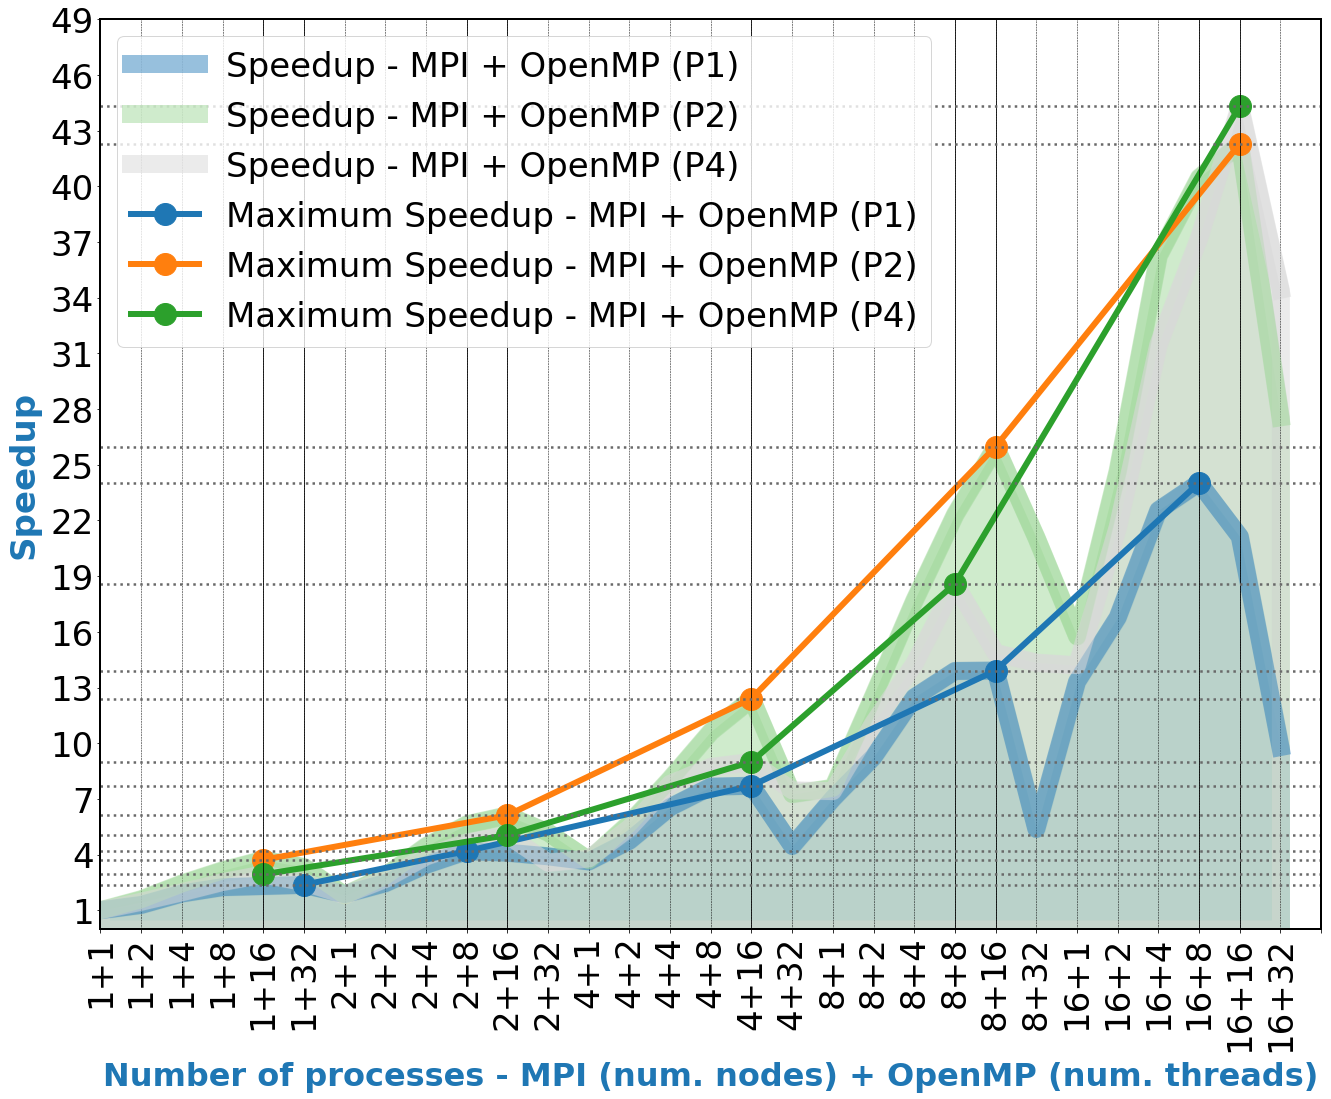

In [3]:
import matplotlib

# Plota a gráfico de area
fig = df[['MPI x OpenMP', 'SpeedUp - MPI + OpenMP (P1)', 'SpeedUp - MPI + OpenMP (P2)', 'SpeedUp - MPI + OpenMP (P4)']].\
plot(kind='area',
     linewidth=18.0, 
     colormap="tab20c",
     x='MPI x OpenMP', 
     fontsize=34, 
     figsize=(18, 15),
     stacked=False
).get_figure()


# Plota a gráfico de linhas
ax = fig.gca()
ax.plot(df.loc[df_p1.index, ['SpeedUp - MPI + OpenMP (P1)']],
        marker='o',
        linestyle='-',
        linewidth=6.0, markersize=22)
ax.plot(df.loc[df_p2.index, ['SpeedUp - MPI + OpenMP (P2)']],
         marker='o',
         linestyle='-',
         linewidth=6.0, markersize=22)
ax.plot(df.loc[df_p4.index, ['SpeedUp - MPI + OpenMP (P4)']],
         marker='o',
         linestyle='-',
         linewidth=6.0, markersize=22)


# plt.xscale('log', basex=2)
# plt.yscale('log', basey=2)
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 
           ['1+1', '1+2', '1+4', '1+8', '1+16', '1+32', '2+1', '2+2', '2+4', '2+8', '2+16', '2+32', '4+1', '4+2', '4+4', '4+8', '4+16', '4+32', '8+1', '8+2', '8+4', '8+8', '8+16', '8+32', '16+1', '16+2', '16+4', '16+8', '16+16', '16+32'], 
           fontsize=34, rotation=90)
n=50
values_sum_2 = [ i+1 for i in range(0,n,3) ]
str_values_sum_2 = [ str(i) for i in values_sum_2 ]
plt.yticks(values_sum_2, str_values_sum_2, fontsize=34)


#   Define as linhas do grid
ax.xaxis.grid(True, linestyle='--', color='k', linewidth='0.5')
lines=[4, 5, 9, 10, 16, 21, 22, 27, 28]
for i in lines:
    ax.axvline(i, linestyle='-', color='k', linewidth='0.8')

lines = df_p1['P1_SpeedUp_Max'].values
for i in lines:
    plt.axhline(i, linestyle=':', color='dimgrey', linewidth='2.5')
lines = df_p2['P2_SpeedUp_Max'].values
for i in lines:
    plt.axhline(i, linestyle=':', color='dimgrey', linewidth='2.5')
lines = df_p4['P4_SpeedUp_Max'].values
for i in lines:
    plt.axhline(i, linestyle=':', color='dimgrey', linewidth='2.5')    
        

#   Plota os labels
plt.tight_layout()
title = 'Central Difference Linear Local'

color='tab:blue'
ax.set_xlabel('Number of processes - MPI (num. nodes) + OpenMP (num. threads)', fontweight='bold', fontsize=32, labelpad=10, color=color)
ax.set_ylabel('Speedup', fontweight='bold',  fontsize=34, labelpad=10, color=color)

ax.legend(['Speedup - MPI + OpenMP (P1)', 'Speedup - MPI + OpenMP (P2)', 'Speedup - MPI + OpenMP (P4)', 
           'Maximum Speedup - MPI + OpenMP (P1)', 'Maximum Speedup - MPI + OpenMP (P2)', 
           'Maximum Speedup - MPI + OpenMP (P4)'], frameon=True, fontsize=34)
fig.set_size_inches(18, 15)

#   Exibe a figura
if (PLOT_FIG):
    plt.show()

In [4]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')
    
    fn = Path(fname_png).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    ax.set_rasterized(True)
    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

In [5]:
#########################################################################
#   Configurações para salvar e plotar o grafico 
fname = "cdl_non-linear_mpi-pure_speedup"
fname_svg = PATH_SVG+fname+".svg"
fname_eps = PATH_EPS+fname+".eps"
fname_png = PATH_PNG+fname+".png"
#########################################################################


#   Leitura do csv para pandas
##### Resultado para CentralDifferenceLinear Local Method
df = pd.read_csv('./data/cdl_non-linear_mpi-openmp.csv')
##### Resultado para CentralDifferenceLinear Local Method - Multiplicate Operations 
#df = pd.read_csv('./data/cdl-linear-multiplicate_mpi-openmp.csv')
pd.set_option('expand_frame_repr', False)
df

Num. Nodes  Num. Threads MPI x OpenMP  Num. Procs. MPI x OpenMP  Runtime (s) - P1  Runtime (s) - P2  Runtime (s) - P4  SpeedUp - Pure MPI (P1)  SpeedUp - MPI + OpenMP (P1)  SpeedUp - Pure MPI (P2)  SpeedUp - MPI + OpenMP (P2)  SpeedUp - Pure MPI (P4)  SpeedUp - MPI + OpenMP (P4)  Efficiency - Pure MPI (P1)  Efficiency - MPI + OpenMP (P1)  Efficiency - Pure MPI (P2)  Efficiency - MPI + OpenMP (P2)  Efficiency - Pure MPI (P4)  Efficiency - MPI + OpenMP (P4)
0            1             1          1+1                         1            4.0013           23.2084          420.4012                   1.0000                       1.0000                   1.0000                       1.0000                   1.0000                       1.0000                      1.0000                          1.0000                      1.0000                          1.0000                      1.0000                          1.0000
1            1             2          1+2                         2            3.1051           14.5474          288.4403                      NaN                       1.2886                      NaN                       1.5954                      NaN                       1.4575                         NaN                          0.6443                         NaN                          0.7977                         NaN                          0.7287
2            1             4          1+4                         4            2.1013            9.4906          213.6806                      NaN                       1.9042                      NaN                       2.4454                      NaN                       1.9674                         NaN                          0.4761                         NaN                          0.6114                         NaN                          0.4919
3            1             8          1+8                         8            1.7808            7.3610          166.6710                      NaN                       2.2469                      NaN                       3.1529                      NaN                       2.5223                         NaN                          0.2809                         NaN                          0.3941                         NaN                          0.3153
4            1            16         1+16                        16            1.7343            6.2384          143.4340                      NaN                       2.3072                      NaN                       3.7202                      NaN                       2.9310                         NaN                          0.1442                         NaN                          0.2325                         NaN                          0.1832
5            1            32         1+32                        32            1.6880            6.9618          167.3314                      NaN                       2.3704                      NaN                       3.3337                      NaN                       2.5124                         NaN                          0.0741                         NaN                          0.1042                         NaN                          0.0785
6            2             1          2+1                         2            2.1445           12.7884          230.4539                   1.8658                       1.8658                   1.8148                       1.8148                   1.8242                       1.8242                      0.9329                          0.9329                      0.9074                          0.9074                      0.9121                          0.9121
7            2             2          2+2                         4            1.6279            8.0999          156.7177                      NaN                       2.4580                      NaN                       2.8653                      NaN                       2.6825         

In [6]:
# print(df.columns)
aggregate_operations = {
    'Num. Nodes':'first', 
    'SpeedUp - Pure MPI (P1)':'max', 
    'SpeedUp - Pure MPI (P2)':'max', 
    'SpeedUp - Pure MPI (P4)':'max',
}
df_result = df.groupby('Num. Nodes').agg(aggregate_operations)
df_result

Num. Nodes  SpeedUp - Pure MPI (P1)  SpeedUp - Pure MPI (P2)  SpeedUp - Pure MPI (P4)
Num. Nodes                                                                                       
1                    1                   1.0000                   1.0000                   1.0000
2                    2                   1.8658                   1.8148                   1.8242
4                    4                   3.6319                   3.7003                   3.7874
8                    8                   7.0198                   7.5991                   7.4198
16                  16                  13.3155                  15.7676                  14.2058

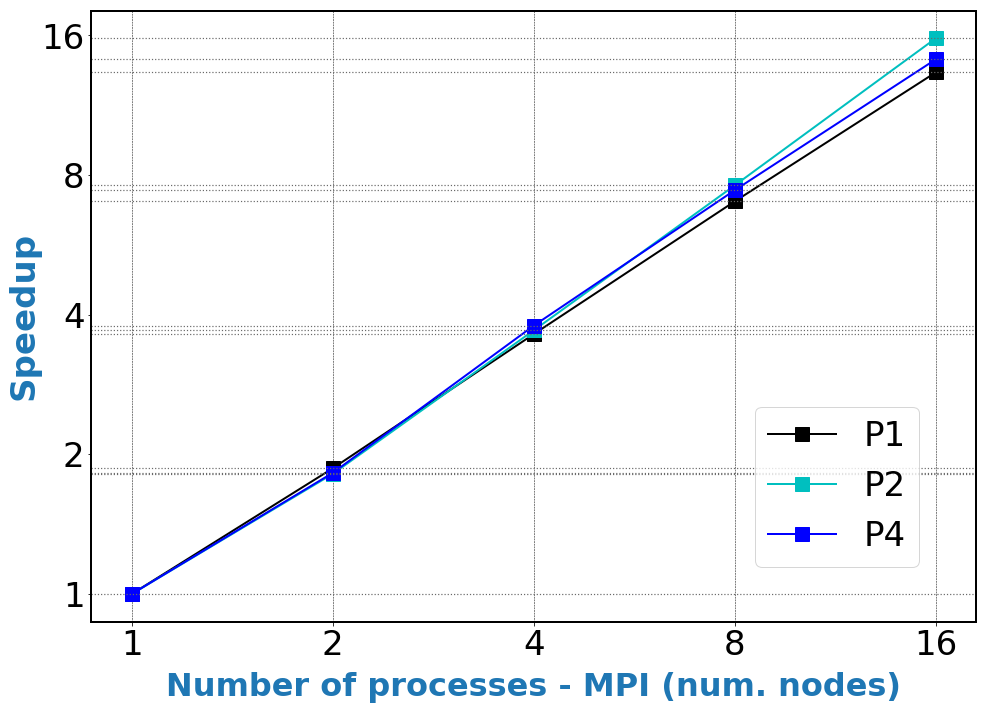

In [7]:
#   Aloca figura para permitir alteracao
fig, ax = plt.subplots()

#   Plotar os valores dos graficos
ax.plot(df_result['Num. Nodes'], df_result['SpeedUp - Pure MPI (P1)'], marker='s', markersize=14, color='k', linewidth=2)
ax.plot(df_result['Num. Nodes'], df_result['SpeedUp - Pure MPI (P2)'], marker='s', markersize=14, color='c', linewidth=2)
ax.plot(df_result['Num. Nodes'], df_result['SpeedUp - Pure MPI (P4)'], marker='s', markersize=14, color='b', linewidth=2)

plt.xscale('log', basex=2)
plt.yscale('log', basey=2)
plt.xticks([1, 2, 4, 8, 16], [1, 2, 4, 8, 16], fontsize=34)
plt.yticks([1, 2, 4, 8, 16], [1, 2, 4, 8, 16], fontsize=34)


#   Define as linhas do grid
ax.xaxis.grid(True, linestyle='--', color='k', linewidth='0.5')

lines = list(df_result['SpeedUp - Pure MPI (P1)'].values) + list(df_result['SpeedUp - Pure MPI (P2)'].values) +\
        list(df_result['SpeedUp - Pure MPI (P4)'].values)    
lines = sorted(set(lines))
for i in lines:
    plt.axhline(i, linestyle=':', color='dimgrey', linewidth='1.2')  
        
#  Plota os labels
plt.tight_layout()
color='tab:blue'
ax.set_xlabel('Number of processes - MPI (num. nodes)', fontweight='bold', fontsize=32, labelpad=10, color=color)
ax.set_ylabel('Speedup', fontweight='bold',  fontsize=34, labelpad=1, color=color)

ax.legend(['P1', 'P2', 'P4'], frameon=True, fontsize=34, loc=(0.75, 0.09))
fig.set_size_inches(15, 11)

#   Exibe a figura
if (PLOT_FIG):
    plt.show()

In [8]:
#   Salva a figura
if (SAVE_FIG):
    fn = Path(fname_svg).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')
    
    fn = Path(fname_png).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

    ax.set_rasterized(True)
    fn = Path(fname_eps).expanduser()
    draw() # necessary to render figure before saving
    fig.savefig(fn, bbox_inches='tight')

<Figure size 432x288 with 0 Axes>